<a href="https://colab.research.google.com/github/SpenBobCat/Algorithmic_Toolbox_Coursera/blob/main/Programming_Assignment_5_Dynamic_Programming_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Programming Assignment 5: Dynamic Programming 1**

Algorithmic Toolbox: University of California - San Diego - Coursera

By: Michael Spencer  6/6/2023

## 1. **Money Change Again**

As we already know, a natural greedy strategy for the change problem does not work correctly for any set of
denominations. For example, if the available denominations are $1, 3,$ and $4,$ the greedy algorithm will change $6$ cents using three coins $(4 + 1 + 1)$ while it can be changed using just two coins $(3 + 3)$. 

Your goal now is to apply dynamic programming for solving the Money Change Problem for denominations $1, 3,$ and $4$.

**Problem Description**

**Input Format:**Integer money.

**Output Format.** The minimum number of coins with denominations $1, 3, 4$ that changes money.
Constraints. $1 \le money \le 10^3$.

**Sample 1.**
- Input:
2
- Output:
2
2 = 1 + 1.

**Sample 2.**
- Input:
34
- Output:
9
34 = 3 + 3 + 4 + 4 + 4 + 4 + 4 + 4 + 4.

```
// By: Michael Spencer

import java.util.Scanner;
import java.util.Arrays;

public class ChangeDP {

    private static int minCoins(int money) {
        int[] denominations = {1, 3, 4};

        // Array to store the minimum coins needed for each value up to money
        int[] dp = new int[money + 1];
        Arrays.fill(dp, 1, dp.length, Integer.MAX_VALUE);

        for (int coin : denominations) {
            for (int amount = coin; amount <= money; amount++) {
                if (dp[amount - coin] != Integer.MAX_VALUE) {
                    dp[amount] = Math.min(dp[amount], dp[amount - coin] + 1);
                }
            }
        }

        // return the minimum coins needed to make change for 'money'
        return dp[money];
    }

    public static void main(String[] args) {
        try (Scanner scanner = new Scanner(System.in)) {
            int m = scanner.nextInt();
            System.out.println(minCoins(m));
        }
    }
}

```

## 2. **Primitive Calculator**

Problem Introduction:

You are given a primitive calculator that can perform the following three operations with the current number $𝑥$: multiply $𝑥$ by $2$, multiply $𝑥$ by $3$, or add $1$ to $𝑥$. 

Your goal is given a positive integer $𝑛$, find the minimum number of operations needed to obtain the number $n$ starting from the number $1$.

**Problem Description:**

**Task:** Given an integer $𝑛$, compute the minimum number of operations needed to obtain the number 𝑛
starting from the number $1$.

**Input Format:** The input consists of a single integer $1 \le 𝑛 \le 10^6$.

**Output Format:** In the first line, output the minimum number $𝑘$ of operations needed to get $𝑛$ from $1$. In the second line output a sequence of intermediate numbers. That is, the second line should contain positive integers $𝑎_0, 𝑎_2, . . . , 𝑎_{k-1}$ such that $𝑎_0 = 1, 𝑎_{𝑘−1} = 𝑛$ and for all $0 \le 𝑖 < 𝑘 − 1, 𝑎_{𝑖+1}$ is equal to either $𝑎_𝑖 + 1, 2𝑎_𝑖,$ or $3𝑎_𝑖$. If there are many such sequences, output any one of them.

Sample 1:
- Input:
1
- Output:
0
1

Sample 2.
- Input:
5
- Output:
3
1 2 4 5

Here, we first multiply 1 by 2 two times and then add 1. Another possibility is to first multiply by 3 and then add 1 two times. Hence “1 3 4 5” is also a valid output in this case.

Sample 3.
- Input:
96234
- Output:
14
1 3 9 10 11 22 66 198 594 1782 5346 16038 16039 32078 96234

Again, another valid output in this case is “1 3 9 10 11 33 99 297 

**Starter Files:**

Going from $1$ to $𝑛$ is the same as going from $𝑛$ to $1$, each time either dividing the current number by $2$ or $3$ or subtracting $1$ from it. Since we would like to go from $𝑛$ to $1$ as fast as possible it is natural to repeatedly reduce $𝑛$ as much as possible. That is, at each step we replace $𝑛$ by $min({\frac{𝑛}{3}, \frac{𝑛}{2}, 𝑛 − 1})$ (the terms $\frac{𝑛}{3}$ and $\frac{𝑛}{2}$ are used only when $𝑛$ is divisible by $3$ and $2$, respectively). We do this until we reach $1$. This gives
rise to the following algorithm and it is implemented in the starter files:

GreedyCalculator$(𝑛)$:
```
𝑛𝑢𝑚𝑂𝑝𝑒𝑟𝑎𝑡𝑖𝑜𝑛𝑠 ← 0
while 𝑛 > 1:
𝑛𝑢𝑚𝑂𝑝𝑒𝑟𝑎𝑡𝑖𝑜𝑛𝑠 ← 𝑛𝑢𝑚𝑂𝑝𝑒𝑟𝑎𝑡𝑖𝑜𝑛𝑠 + 1
if 𝑛 mod 3 = 0:
𝑛 ← 𝑛/3
else if 𝑛 mod 2 = 0:
𝑛 ← 𝑛/2
else:
𝑛 ← 𝑛 − 1
return 𝑛𝑢𝑚𝑂𝑝𝑒𝑟𝑎𝑡𝑖𝑜𝑛𝑠
```

This seemingly correct algorithm is in fact incorrect. You may want to submit one of the starter files to ensure this. Hence in this case moving from $𝑛$ to $min({\frac{𝑛}{3}, \frac{𝑛}{2}, 𝑛 − 1})$ is not safe.




```
\\ By: Michael Spencer

import java.util.ArrayList;
import java.util.Collections;
import java.util.Scanner;

public class primitiveCalculator {
    public static void main(String[] args) {
        try (Scanner scanner = new Scanner(System.in)) {
            int n = scanner.nextInt();
            ArrayList<Integer> sequence = computeOperations(n);
            System.out.println(sequence.size() - 1);
            for (Integer num : sequence) {
                System.out.print(num + " ");
            }
        }
    }

    private static ArrayList<Integer> computeOperations(int n) {
        int[] dp = new int[n + 1];
        int[] predecessor = new int[n + 1];

        for (int i = 2; i <= n; i++) {
            dp[i] = dp[i - 1] + 1;
            predecessor[i] = i - 1;

            if (i % 2 == 0) {
                if (dp[i / 2] < dp[i]) {
                    dp[i] = dp[i / 2] + 1;
                    predecessor[i] = i / 2;
                }
            }

            if (i % 3 == 0) {
                if (dp[i / 3] < dp[i]) {
                    dp[i] = dp[i / 3] + 1;
                    predecessor[i] = i / 3;
                }
            }
        }

        ArrayList<Integer> sequence = new ArrayList<>();
        for (int i = n; i != 0; i = predecessor[i]) {
            sequence.add(i);
        }
        Collections.reverse(sequence);

        return sequence;
    }
}


```

## 3. **Edit Distance.**

Problem Introduction:

The edit distance between two strings is the minimum number of operations (insertions, deletions, and substitutions of symbols) to transform one string into another. It is a measure of similarity of two strings. Edit distance has applications, for example, in computational biology, natural language processing, and spell checking. Your goal in this problem is to compute the edit distance between two strings.

Problem Description:

Task: The goal of this problem is to implement the algorithm for computing the edit distance between two strings.

Input Format. Each of the two lines of the input contains a string consisting of lower case latin letters.

Constraints. The length of both strings is at least 1 and at most 100.

Output Format. Output the edit distance between the given two strings.

Sample 1.

Input:
ab
ab
Output:
0 

Sample 2.

Input:
short
ports
Output:
3

An alignment of total cost 3:

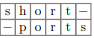


Sample 3.

Input:
editing
distance
Output:
5

An alignment of total cost 5:

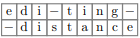


```
\\ By: Michael Spencer

import java.util.Scanner;

public class EditDistance {
    public static void main(String[] args) {
        try (Scanner scanner = new Scanner(System.in)) {
          String firstString = scanner.next();
          String secondString = scanner.next();
          System.out.println(editDistance(firstString, secondString));
        }
    }

    private static int editDistance(String firstString, String secondString) {
        int m = firstString.length();
        int n = secondString.length();
        int[][] dp = new int[m+1][n+1];

        for (int i=0; i<=m; i++) {
            for (int j=0; j<=n; j++) {
                if (i==0) {
                    dp[i][j] = j;
                } else if (j==0) {
                    dp[i][j] = i;
                } else if (firstString.charAt(i-1) == secondString.charAt(j-1)) {
                    dp[i][j] = dp[i-1][j-1];
                } else {
                    dp[i][j] = 1 + Math.min(dp[i][j-1], Math.min(dp[i-1][j], dp[i-1][j-1]));
                }
            }
        }

        return dp[m][n];
    }
}

```

## 4. **Longest Common Subsequence of Two Sequences.**

**Problem Introduction:**

Compute the length of a longest common subsequence of three sequences.

**Problem Description:**

**Task:** Given two sequences $𝐴 = (𝑎_1, 𝑎_2, . . . , 𝑎_𝑛)$ and $𝐵 = (𝑏_1, 𝑏_2, . . . , 𝑏_𝑚)$, find the length of their longest common subsequence, i.e., the largest non-negative integer $p$ such that there exist indices $1 \le 𝑖_1 <
𝑖_2 < · · · < 𝑖_𝑝 \le 𝑛$ and $1 \le 𝑗_1 < 𝑗_2 < · · · < 𝑗_𝑝 \le 𝑚$, such that $𝑎_{𝑖_1} = 𝑏_{𝑗_1}, . . . , 𝑎_{𝑖_𝑝} = 𝑏_{𝑗_𝑝}$.

**Input Format.** 

**First line:** $𝑛$. Second line: $𝑎_1, 𝑎_2, . . . , 𝑎_𝑛$. Third line: $𝑚$. Fourth line: $𝑏_1, 𝑏_2, . . . , 𝑏_𝑚$.
Constraints. $1 \le 𝑛, 𝑚 \le 100; −10^9 < 𝑎_𝑖, 𝑏_𝑖 < 10^9$.

**Output Format.** 

**Output:** $p$

**Sample 1.**
- Input:
3
2 7 5
2
2 5
- Output:
2

A common subsequence of length 2 is (2, 5).

**Sample 2.**
- Input:
1
7
4
1 2 3 4
- Output:
0

The two sequences do not share elements.

**Sample 3.**
- Input:
4
2 7 8 3
4
5 2 8 7
- Output:
2

One common subsequence is (2, 7). Another one is (2, 8).

```
\\ By: Michael Spencer

import java.util.Scanner;

public class LCS2 {

    private static int lcs2(int[] a, int[] b) {
        int n = a.length;
        int m = b.length;
        int[][] dp = new int[n+1][m+1];

        for (int i = 1; i <= n; i++) {
            for (int j = 1; j <= m; j++) {
                if (a[i-1] == b[j-1]) {
                    dp[i][j] = dp[i-1][j-1] + 1;
                } else {
                    dp[i][j] = Math.max(dp[i-1][j], dp[i][j-1]);
                }
            }
        }

        return dp[n][m];
    }

    public static void main(String[] args) {
        try (Scanner scanner = new Scanner(System.in)) {
            int n = scanner.nextInt();
            int[] a = new int[n];
            for (int i = 0; i < n; i++) {
                a[i] = scanner.nextInt();
            }

            int m = scanner.nextInt();
            int[] b = new int[m];
            for (int i = 0; i < m; i++) {
                b[i] = scanner.nextInt();
            }

            System.out.println(lcs2(a, b));
        }
    }
}

```

## 5. **Longest Common Subsequence of Three Sequences**

**Problem Introduction.**

Compute the length of a longest common subsequence of three sequences.

**Problem Description:**

**Task.** Given three sequences $𝐴 = (𝑎_1, 𝑎_2, . . . , 𝑎_𝑛), 𝐵 = (𝑏_1, 𝑏_2, . . . , 𝑏_𝑚)$, and $𝐶 = (𝑐_1, 𝑐_2, . . . , 𝑐_𝑙)$, find the length of their longest common subsequence, i.e., the largest non-negative integer $𝑝$ such that there
exist indices $1 \le 𝑖_1 < 𝑖_2 < · · · < 𝑖_𝑝 \le 𝑛, 1 \le 𝑗_1 < 𝑗_2 < · · · < 𝑗_𝑝 \le 𝑚, 1 \le 𝑘_1 < 𝑘_2 < · · · < 𝑘_𝑝 \le 𝑙$ such that $𝑎_{𝑖_1} = 𝑏_{𝑗_1} = 𝑐_{k_1} ,  . . . , 𝑎_{𝑖_𝑝} = 𝑏_{𝑗_𝑝} = 𝑐_{𝑘_𝑝}$

**Input Format.** First line: $𝑛$. Second line: $𝑎_1, 𝑎_2, . . . , 𝑎_𝑛$. Third line: $𝑚$. Fourth line: $𝑏_1, 𝑏_2, . . . , 𝑏_𝑚$. Fifth line:
$𝑙$. Sixth line: $𝑐_1, 𝑐_2, . . . , 𝑐_𝑙$.

**Constraints.** $1 \le 𝑛, 𝑚, 𝑙 \le 100; −10^9 < 𝑎_𝑖
, 𝑏_𝑖, 𝑐_𝑖 < 10^9$.

**Output Format.**

Output: $𝑝$

**Sample 1.**
- Input:
3
1 2 3
3
2 1 3
3
1 3 5
- Output:
2

A common subsequence of length 2 is (1, 3).

**Sample 2.**
- Input:
5
8 3 2 1 7
7
8 2 1 3 8 10 7
6
6 8 3 1 4 7
- Output:
3

One common subsequence of length 3 in this case is (8, 3, 7). Another one is (8, 1, 7).


```
\\ By: Michael Spencer

import java.util.Scanner;

public class LCS3 {
    private static int lcs3(int[] a, int[] b, int[] c) {
        int[][][] dp = new int[a.length + 1][b.length + 1][c.length + 1];
        for (int i = 1; i <= a.length; i++) {
            for (int j = 1; j <= b.length; j++) {
                for (int k = 1; k <= c.length; k++) {
                    if (a[i - 1] == b[j - 1] && b[j - 1] == c[k - 1]) {
                        dp[i][j][k] = dp[i - 1][j - 1][k - 1] + 1;
                    } else {
                        dp[i][j][k] = Math.max(Math.max(dp[i - 1][j][k], dp[i][j - 1][k]), dp[i][j][k - 1]);
                    }
                }
            }
        }
        return dp[a.length][b.length][c.length];
    }

    public static void main(String[] args) {
        try (Scanner scanner = new Scanner(System.in)) {
            int n = scanner.nextInt();
            int[] a = new int[n];
            for (int i = 0; i < n; i++) {
                a[i] = scanner.nextInt();
            }

            int m = scanner.nextInt();
            int[] b = new int[m];
            for (int i = 0; i < m; i++) {
                b[i] = scanner.nextInt();
            }

            int q = scanner.nextInt();
            int[] c = new int[q];
            for (int i = 0; i < q; i++) {
                c[i] = scanner.nextInt();
            }

            System.out.println(lcs3(a, b, c));
        }
    }
}

```

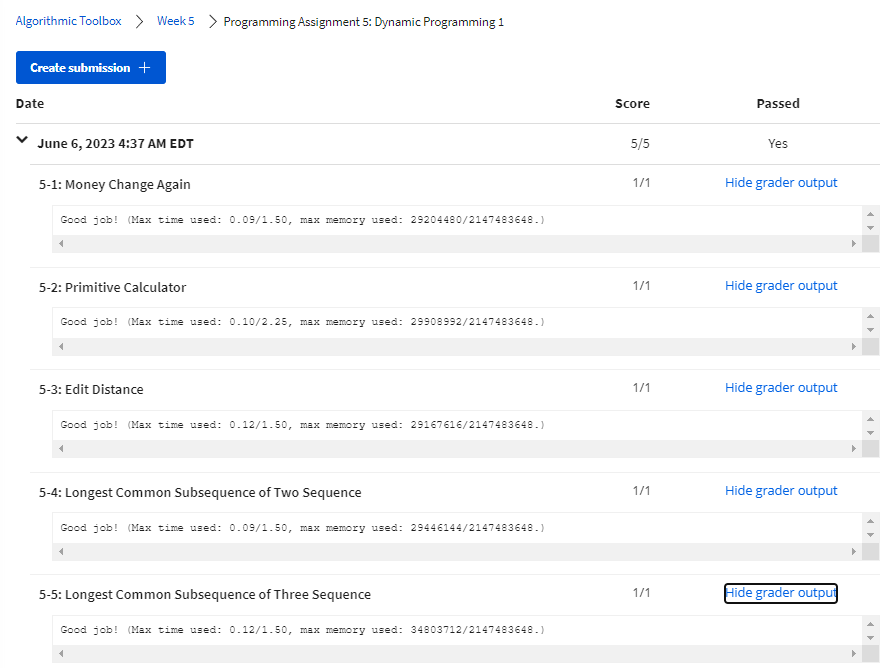